Copyright 2020 Abhishek Dabas

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CO

# Abstract
In this notebook we will try to implement a value based algorithm known as SARSA. We will try to use and go ahead with drawbacks and avantages of using it in one of the OPEN AI Gym environemnt.

## Reinforcement Learning world
<img src= "image/RL_hierarchy.jpg">

# Model free Methods:
In this type of Reinforcement Learning we do not have a Framework of the whole world, but try to learn it from sample of actions, or by trail and error

# Value Based Method
Almost all reinforcement learning algorithms are based on estimating value functions--functions of states (or of state-action pairs) that estimate how good it is for the agent to be in a given state (or how good it is to perform a given action in a given state). The notion of "how good" here is defined in terms of future rewards that can be expected, or, to be precise, in terms of expected return. Of course the rewards the agent can expect to receive in the future depend on what actions it will take. Accordingly, value functions are defined with respect to particular policies.

Recall that a policy, $\pi$ , is a mapping from each state,$ s \epsilon S $ , and action, $ a \epsilon A $ , to the probability $\pi(s,a)$  of taking action, a ,when in state, s. Informally, the value of a state, s under a policy $\pi$ , denoted $V*(s)$ , is the expected return when starting in, s and following, $\pi$  thereafter!!

## Temporal difference
Temporal difference is an agent learning from an environment through episodes with no prior knowledge of the environment

1. **On Policy** : It will evaluate or improve the policy that is used to make decisions. They evaluate and improve the same policy, which the agent started using, to select an action. In contrast, off-policy methods evaluate or improve a policy different from that used to generate the data. 
1. **Off- Policy** : It is independent of the agent’s actions. It figures out the optimal policy regardless of the agent’s motivation. For example, Q-learning is an off-policy learner.

# Off-Policy: 
## Q- learning
- It is an **Off-policy algorithm**. 
- In the Q-learning, target policy is a greedy policy and behavior policy is the ε-greedy policy (this ensures exploration).
- Learns with exploratio, plays without explorations. It learns from the games played in the past. 

# On-policy
## SARSA:
It is a slight variation
- One of the TD learning algorithms for control or inprovement is SARSA. The name ``SARSA`` comes from the fact that one step from the state-action value pair to anothe state-action value pair and the reward along the way. So it is basically so its the tuble of $ S t, A t, R t+1, S t+1 & A t+1 $, which creates **SARSA**.
- It is one of the **On-policy** Methods. 
- SARSA uses action-value function Q and follows the policy $\pi$
- SARSA estimates the value of the policy being followed\
**NOTE:** Other Examples: Policy Iteration, Value Iteration, Monte carlo ETC

## Difference:
- SARSA Converges better than Q learning algorithms
- The maximum reward for the next state is not necessarily used for updating the Q-values
## Similarity
- Both want to estimate the Q-matrix

### Imports

In [1]:
## Imports

import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

In [2]:
# Hyper parameters for the RL agent
alpha = 0.1
gamma = 0.99
epsilon = 0.5
epsilon_decay = 0.999
verbose = True

In [3]:
# Define types of algorithms

# Choose methods for learning and exploration
rl_algorithm = "SARSA"

explore_method = 'EPSILON_GREEDY'
print(f'Exploration mehtod chosen: {explore_method}')

Exploration mehtod chosen: EPSILON_GREEDY


In [4]:
## Acting with epsilon greedy method
def take_action_using_epsilon_greedy(s, q):
    
    a = np.argmax(q[s, :])
    if np.random.rand() < epsilon:
        a = np.random.randint(q.shape[1])
    return a


#### SARSA Function

In [5]:
## Computing the SARSA update
def sarsa_update(q, s, a, r, s_prime, a_prime):
    

    td = r + gamma * q[s_prime, a_prime] - q[s, a]
    return q[s, a] + alpha * td

In [6]:
## Evaluation function

def evaluate_policy(q, env, n, h, explore_type):
    

    success_rate = 0.0
    mean_return = 0.0

    for i in range(n):
        discounted_return = 0.0
        s = env.reset()

        for step in range(h):
            if explore_type == "EPSILON_GREEDY":
                s, r, done, info = env.step(
                    take_action_using_epsilon_greedy(s, q))
            else:
                raise ValueError(
                    "Wrong Explore Method in evaluation:".format(explore_type))

            discounted_return += np.power(gamma, step) * r

            if done:
                success_rate += float(r) / n
                mean_return += float(discounted_return) / n
                break

    return success_rate, mean_return

In [7]:
# Choose a gym  environment
env_name = 'FrozenLake-v0'

# well choose a Random seed
np.random.RandomState(121)

# lets Create the Environment
env = gym.make(env_name)

# Take State-Action space size
n_a = env.action_space.n
n_s = env.observation_space.n

# setup
n_episode = 10000
print("n_episode ", n_episode)
max_horizon = 100
eval_steps = 10

# Monitoring performance
window = deque(maxlen=100)

greedy_success_rate_monitor = np.zeros([n_episode, 1])
greedy_discounted_return_monitor = np.zeros([n_episode, 1])

behaviour_success_rate_monitor = np.zeros([n_episode, 1])
behaviour_discounted_return_monitor = np.zeros([n_episode, 1])

# Init Q-table
q_table = np.zeros([n_s, n_a])

env.reset()

n_episode  10000


0

Training....

Episode: 0	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.500	Success Rate: 0.000	Last_100: 0
Episode: 1	 Num_Steps:   18	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.499	Success Rate: 0.000	Last_100: 0
Episode: 2	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.499	Success Rate: 0.000	Last_100: 0
Episode: 3	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.499	Success Rate: 0.000	Last_100: 0
Episode: 4	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.498	Success Rate: 0.000	Last_100: 0
Episode: 5	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.498	Success Rate: 0.000	Last_100: 0
Episode: 6	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.497	Success Rate: 0.000	Last_100: 0
Episode: 7	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.497	Success Rate: 0.000	Last_100: 0
Episode: 8	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.496	Success Rate: 0

Episode: 91	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.456	Success Rate: 0.000	Last_100: 0
Episode: 92	 Num_Steps:   32	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.456	Success Rate: 0.000	Last_100: 0
Episode: 93	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.456	Success Rate: 0.000	Last_100: 0
Episode: 94	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.455	Success Rate: 0.000	Last_100: 0
Episode: 95	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.455	Success Rate: 0.100	Last_100: 0
Episode: 96	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.454	Success Rate: 0.000	Last_100: 0
Episode: 97	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.454	Success Rate: 0.000	Last_100: 0
Episode: 98	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.453	Success Rate: 0.000	Last_100: 0
Episode: 99	 Num_Steps:   16	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.453	Succes

Episode: 173	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.421	Success Rate: 0.000	Last_100: 0
Episode: 174	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.420	Success Rate: 0.000	Last_100: 0
Episode: 175	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.420	Success Rate: 0.000	Last_100: 0
Episode: 176	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.419	Success Rate: 0.000	Last_100: 0
Episode: 177	 Num_Steps:   16	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.419	Success Rate: 0.000	Last_100: 0
Episode: 178	 Num_Steps:   18	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.418	Success Rate: 0.000	Last_100: 0
Episode: 179	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.418	Success Rate: 0.000	Last_100: 0
Episode: 180	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.418	Success Rate: 0.000	Last_100: 0
Episode: 181	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.4

Episode: 246	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.391	Success Rate: 0.000	Last_100: 0
Episode: 247	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.391	Success Rate: 0.000	Last_100: 0
Episode: 248	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.390	Success Rate: 0.000	Last_100: 0
Episode: 249	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.390	Success Rate: 0.000	Last_100: 0
Episode: 250	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.389	Success Rate: 0.000	Last_100: 0
Episode: 251	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.389	Success Rate: 0.000	Last_100: 0
Episode: 252	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.389	Success Rate: 0.000	Last_100: 0
Episode: 253	 Num_Steps:   20	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.388	Success Rate: 0.000	Last_100: 0
Episode: 254	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.3

Episode: 328	 Num_Steps:   20	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.360	Success Rate: 0.000	Last_100: 0
Episode: 329	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.360	Success Rate: 0.000	Last_100: 0
Episode: 330	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.359	Success Rate: 0.000	Last_100: 0
Episode: 331	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.359	Success Rate: 0.000	Last_100: 0
Episode: 332	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.359	Success Rate: 0.000	Last_100: 0
Episode: 333	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.358	Success Rate: 0.000	Last_100: 0
Episode: 334	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.358	Success Rate: 0.000	Last_100: 0
Episode: 335	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.358	Success Rate: 0.000	Last_100: 0
Episode: 336	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.3

Episode: 407	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.333	Success Rate: 0.000	Last_100: 0
Episode: 408	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.332	Success Rate: 0.000	Last_100: 0
Episode: 409	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.332	Success Rate: 0.000	Last_100: 0
Episode: 410	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.332	Success Rate: 0.000	Last_100: 0
Episode: 411	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.331	Success Rate: 0.000	Last_100: 0
Episode: 412	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.331	Success Rate: 0.000	Last_100: 0
Episode: 413	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.331	Success Rate: 0.000	Last_100: 0
Episode: 414	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.330	Success Rate: 0.000	Last_100: 0
Episode: 415	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.3

Episode: 493	 Num_Steps:   16	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.305	Success Rate: 0.000	Last_100: 8
Episode: 494	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.305	Success Rate: 0.100	Last_100: 8
Episode: 495	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.305	Success Rate: 0.000	Last_100: 8
Episode: 496	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.304	Success Rate: 0.000	Last_100: 8
Episode: 497	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.304	Success Rate: 0.000	Last_100: 8
Episode: 498	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.304	Success Rate: 0.000	Last_100: 8
Episode: 499	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.303	Success Rate: 0.000	Last_100: 8
Episode: 500	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.303	Success Rate: 0.100	Last_100: 8
Episode: 501	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.3

Episode: 590	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.277	Success Rate: 0.100	Last_100: 2
Episode: 591	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.277	Success Rate: 0.100	Last_100: 2
Episode: 592	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.277	Success Rate: 0.100	Last_100: 2
Episode: 593	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.276	Success Rate: 0.000	Last_100: 2
Episode: 594	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.276	Success Rate: 0.000	Last_100: 2
Episode: 595	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.276	Success Rate: 0.100	Last_100: 2
Episode: 596	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.275	Success Rate: 0.000	Last_100: 2
Episode: 597	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.275	Success Rate: 0.000	Last_100: 2
Episode: 598	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.2

Episode: 687	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.251	Success Rate: 0.000	Last_100: 8
Episode: 688	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.251	Success Rate: 0.000	Last_100: 8
Episode: 689	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.251	Success Rate: 0.000	Last_100: 8
Episode: 690	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.251	Success Rate: 0.000	Last_100: 8
Episode: 691	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.250	Success Rate: 0.000	Last_100: 8
Episode: 692	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.250	Success Rate: 0.000	Last_100: 8
Episode: 693	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.250	Success Rate: 0.100	Last_100: 8
Episode: 694	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.250	Success Rate: 0.000	Last_100: 8
Episode: 695	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.2

Episode: 784	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.228	Success Rate: 0.200	Last_100: 4
Episode: 785	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.228	Success Rate: 0.100	Last_100: 4
Episode: 786	 Num_Steps:   23	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.228	Success Rate: 0.000	Last_100: 4
Episode: 787	 Num_Steps:    9	Total_Return:  0.91	Final_Reward: 1.0	Epsilon: 0.228	Success Rate: 0.000	Last_100: 5
Episode: 788	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.227	Success Rate: 0.000	Last_100: 6
Episode: 789	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.227	Success Rate: 0.300	Last_100: 6
Episode: 790	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.227	Success Rate: 0.000	Last_100: 6
Episode: 791	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.227	Success Rate: 0.100	Last_100: 6
Episode: 792	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.2

Episode: 858	 Num_Steps:   18	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.212	Success Rate: 0.000	Last_100: 13
Episode: 859	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.212	Success Rate: 0.100	Last_100: 13
Episode: 860	 Num_Steps:   22	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.211	Success Rate: 0.000	Last_100: 13
Episode: 861	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.211	Success Rate: 0.100	Last_100: 13
Episode: 862	 Num_Steps:   21	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.211	Success Rate: 0.300	Last_100: 13
Episode: 863	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.211	Success Rate: 0.000	Last_100: 13
Episode: 864	 Num_Steps:   39	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.211	Success Rate: 0.100	Last_100: 13
Episode: 865	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.210	Success Rate: 0.100	Last_100: 13
Episode: 866	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsi

Episode: 948	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.194	Success Rate: 0.200	Last_100: 15
Episode: 949	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.193	Success Rate: 0.100	Last_100: 15
Episode: 950	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.193	Success Rate: 0.100	Last_100: 16
Episode: 951	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.193	Success Rate: 0.100	Last_100: 16
Episode: 952	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.193	Success Rate: 0.200	Last_100: 17
Episode: 953	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.193	Success Rate: 0.300	Last_100: 17
Episode: 954	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.193	Success Rate: 0.100	Last_100: 17
Episode: 955	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.192	Success Rate: 0.100	Last_100: 17
Episode: 956	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsi

Episode: 1022	 Num_Steps:    7	Total_Return:  0.93	Final_Reward: 1.0	Epsilon: 0.180	Success Rate: 0.200	Last_100: 19
Episode: 1023	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.180	Success Rate: 0.200	Last_100: 19
Episode: 1024	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.179	Success Rate: 0.100	Last_100: 19
Episode: 1025	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.179	Success Rate: 0.500	Last_100: 19
Episode: 1026	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.179	Success Rate: 0.200	Last_100: 19
Episode: 1027	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.179	Success Rate: 0.100	Last_100: 20
Episode: 1028	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.179	Success Rate: 0.200	Last_100: 21
Episode: 1029	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.179	Success Rate: 0.300	Last_100: 21
Episode: 1030	 Num_Steps:   14	Total_Return:  0.87	Final_Reward:

Episode: 1094	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.167	Success Rate: 0.100	Last_100: 25
Episode: 1095	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.167	Success Rate: 0.300	Last_100: 25
Episode: 1096	 Num_Steps:   12	Total_Return:  0.89	Final_Reward: 1.0	Epsilon: 0.167	Success Rate: 0.100	Last_100: 25
Episode: 1097	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.167	Success Rate: 0.100	Last_100: 25
Episode: 1098	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.167	Success Rate: 0.100	Last_100: 26
Episode: 1099	 Num_Steps:   40	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.167	Success Rate: 0.100	Last_100: 25
Episode: 1100	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.166	Success Rate: 0.100	Last_100: 25
Episode: 1101	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.166	Success Rate: 0.500	Last_100: 25
Episode: 1102	 Num_Steps:   22	Total_Return:  0.80	Final_Reward:

Episode: 1180	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.154	Success Rate: 0.400	Last_100: 26
Episode: 1181	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.153	Success Rate: 0.300	Last_100: 27
Episode: 1182	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.153	Success Rate: 0.100	Last_100: 27
Episode: 1183	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.153	Success Rate: 0.300	Last_100: 26
Episode: 1184	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.153	Success Rate: 0.300	Last_100: 25
Episode: 1185	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.153	Success Rate: 0.200	Last_100: 25
Episode: 1186	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.153	Success Rate: 0.300	Last_100: 25
Episode: 1187	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.152	Success Rate: 0.200	Last_100: 26
Episode: 1188	 Num_Steps:   13	Total_Return:  0.00	Final_Reward:

Episode: 1261	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.142	Success Rate: 0.200	Last_100: 27
Episode: 1262	 Num_Steps:   17	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.141	Success Rate: 0.100	Last_100: 26
Episode: 1263	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.141	Success Rate: 0.200	Last_100: 26
Episode: 1264	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.141	Success Rate: 0.400	Last_100: 26
Episode: 1265	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.141	Success Rate: 0.400	Last_100: 26
Episode: 1266	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.141	Success Rate: 0.100	Last_100: 26
Episode: 1267	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.141	Success Rate: 0.300	Last_100: 26
Episode: 1268	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.141	Success Rate: 0.100	Last_100: 27
Episode: 1269	 Num_Steps:   18	Total_Return:  0.00	Final_Reward:

Episode: 1334	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.132	Success Rate: 0.400	Last_100: 15
Episode: 1335	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.131	Success Rate: 0.500	Last_100: 15
Episode: 1336	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.131	Success Rate: 0.100	Last_100: 16
Episode: 1337	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.131	Success Rate: 0.200	Last_100: 15
Episode: 1338	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.131	Success Rate: 0.500	Last_100: 15
Episode: 1339	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.131	Success Rate: 0.100	Last_100: 15
Episode: 1340	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.131	Success Rate: 0.300	Last_100: 15
Episode: 1341	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.131	Success Rate: 0.200	Last_100: 15
Episode: 1342	 Num_Steps:   17	Total_Return:  0.84	Final_Reward:

Episode: 1407	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.122	Success Rate: 0.500	Last_100: 32
Episode: 1408	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.122	Success Rate: 0.300	Last_100: 33
Episode: 1409	 Num_Steps:   64	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.122	Success Rate: 0.300	Last_100: 33
Episode: 1410	 Num_Steps:   47	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.122	Success Rate: 0.000	Last_100: 34
Episode: 1411	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.122	Success Rate: 0.400	Last_100: 35
Episode: 1412	 Num_Steps:   30	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.122	Success Rate: 0.200	Last_100: 35
Episode: 1413	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.122	Success Rate: 0.300	Last_100: 34
Episode: 1414	 Num_Steps:   50	Total_Return:  0.61	Final_Reward: 1.0	Epsilon: 0.121	Success Rate: 0.400	Last_100: 35
Episode: 1415	 Num_Steps:   53	Total_Return:  0.00	Final_Reward:

Episode: 1494	 Num_Steps:   35	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.112	Success Rate: 0.400	Last_100: 30
Episode: 1495	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.112	Success Rate: 0.200	Last_100: 30
Episode: 1496	 Num_Steps:   34	Total_Return:  0.71	Final_Reward: 1.0	Epsilon: 0.112	Success Rate: 0.200	Last_100: 31
Episode: 1497	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.112	Success Rate: 0.600	Last_100: 30
Episode: 1498	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.112	Success Rate: 0.100	Last_100: 30
Episode: 1499	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.112	Success Rate: 0.100	Last_100: 30
Episode: 1500	 Num_Steps:    7	Total_Return:  0.93	Final_Reward: 1.0	Epsilon: 0.111	Success Rate: 0.300	Last_100: 31
Episode: 1501	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.111	Success Rate: 0.300	Last_100: 32
Episode: 1502	 Num_Steps:   14	Total_Return:  0.87	Final_Reward:

Episode: 1575	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.103	Success Rate: 0.600	Last_100: 43
Episode: 1576	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.103	Success Rate: 0.500	Last_100: 43
Episode: 1577	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.103	Success Rate: 0.200	Last_100: 43
Episode: 1578	 Num_Steps:   69	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.103	Success Rate: 0.400	Last_100: 42
Episode: 1579	 Num_Steps:   30	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.103	Success Rate: 0.400	Last_100: 41
Episode: 1580	 Num_Steps:   56	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.103	Success Rate: 0.400	Last_100: 41
Episode: 1581	 Num_Steps:    8	Total_Return:  0.92	Final_Reward: 1.0	Epsilon: 0.103	Success Rate: 0.200	Last_100: 41
Episode: 1582	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.103	Success Rate: 0.300	Last_100: 42
Episode: 1583	 Num_Steps:   47	Total_Return:  0.62	Final_Reward:

Episode: 1653	 Num_Steps:   42	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.096	Success Rate: 0.500	Last_100: 38
Episode: 1654	 Num_Steps:   43	Total_Return:  0.65	Final_Reward: 1.0	Epsilon: 0.096	Success Rate: 0.600	Last_100: 39
Episode: 1655	 Num_Steps:   19	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.095	Success Rate: 0.000	Last_100: 38
Episode: 1656	 Num_Steps:   36	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.095	Success Rate: 0.500	Last_100: 39
Episode: 1657	 Num_Steps:   35	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.095	Success Rate: 0.200	Last_100: 39
Episode: 1658	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.095	Success Rate: 0.600	Last_100: 40
Episode: 1659	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.095	Success Rate: 0.300	Last_100: 39
Episode: 1660	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.095	Success Rate: 0.500	Last_100: 38
Episode: 1661	 Num_Steps:   31	Total_Return:  0.00	Final_Reward:

Episode: 1729	 Num_Steps:   37	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.089	Success Rate: 0.400	Last_100: 38
Episode: 1730	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.089	Success Rate: 0.100	Last_100: 38
Episode: 1731	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.088	Success Rate: 0.400	Last_100: 38
Episode: 1732	 Num_Steps:    5	Total_Return:  0.95	Final_Reward: 1.0	Epsilon: 0.088	Success Rate: 0.600	Last_100: 38
Episode: 1733	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.088	Success Rate: 0.300	Last_100: 38
Episode: 1734	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.088	Success Rate: 0.500	Last_100: 39
Episode: 1735	 Num_Steps:   49	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.088	Success Rate: 0.500	Last_100: 39
Episode: 1736	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.088	Success Rate: 0.700	Last_100: 39
Episode: 1737	 Num_Steps:   20	Total_Return:  0.00	Final_Reward:

Episode: 1808	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.082	Success Rate: 0.400	Last_100: 34
Episode: 1809	 Num_Steps:   72	Total_Return:  0.48	Final_Reward: 1.0	Epsilon: 0.082	Success Rate: 0.200	Last_100: 34
Episode: 1810	 Num_Steps:   34	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.082	Success Rate: 0.300	Last_100: 34
Episode: 1811	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.082	Success Rate: 0.300	Last_100: 35
Episode: 1812	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.082	Success Rate: 0.200	Last_100: 35
Episode: 1813	 Num_Steps:   20	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.082	Success Rate: 0.700	Last_100: 35
Episode: 1814	 Num_Steps:   56	Total_Return:  0.57	Final_Reward: 1.0	Epsilon: 0.081	Success Rate: 0.700	Last_100: 35
Episode: 1815	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.081	Success Rate: 0.700	Last_100: 35
Episode: 1816	 Num_Steps:   12	Total_Return:  0.00	Final_Reward:

Episode: 1882	 Num_Steps:   38	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.076	Success Rate: 0.400	Last_100: 46
Episode: 1883	 Num_Steps:   22	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.076	Success Rate: 0.800	Last_100: 46
Episode: 1884	 Num_Steps:    7	Total_Return:  0.93	Final_Reward: 1.0	Epsilon: 0.076	Success Rate: 0.500	Last_100: 47
Episode: 1885	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.076	Success Rate: 0.600	Last_100: 46
Episode: 1886	 Num_Steps:   67	Total_Return:  0.51	Final_Reward: 1.0	Epsilon: 0.076	Success Rate: 0.500	Last_100: 46
Episode: 1887	 Num_Steps:   24	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.076	Success Rate: 0.600	Last_100: 46
Episode: 1888	 Num_Steps:   23	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.076	Success Rate: 0.700	Last_100: 46
Episode: 1889	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.076	Success Rate: 0.600	Last_100: 47
Episode: 1890	 Num_Steps:   31	Total_Return:  0.00	Final_Reward:

Episode: 1957	 Num_Steps:   20	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.071	Success Rate: 0.500	Last_100: 37
Episode: 1958	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.071	Success Rate: 0.700	Last_100: 37
Episode: 1959	 Num_Steps:   54	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.070	Success Rate: 0.300	Last_100: 37
Episode: 1960	 Num_Steps:   26	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.070	Success Rate: 0.400	Last_100: 37
Episode: 1961	 Num_Steps:   49	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.070	Success Rate: 0.400	Last_100: 37
Episode: 1962	 Num_Steps:   34	Total_Return:  0.71	Final_Reward: 1.0	Epsilon: 0.070	Success Rate: 0.600	Last_100: 37
Episode: 1963	 Num_Steps:   33	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.070	Success Rate: 0.200	Last_100: 37
Episode: 1964	 Num_Steps:    8	Total_Return:  0.92	Final_Reward: 1.0	Epsilon: 0.070	Success Rate: 0.300	Last_100: 38
Episode: 1965	 Num_Steps:   14	Total_Return:  0.00	Final_Reward:

Episode: 2036	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.065	Success Rate: 0.500	Last_100: 49
Episode: 2037	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.065	Success Rate: 0.500	Last_100: 50
Episode: 2038	 Num_Steps:   54	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.065	Success Rate: 0.600	Last_100: 49
Episode: 2039	 Num_Steps:   36	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.065	Success Rate: 0.400	Last_100: 49
Episode: 2040	 Num_Steps:   65	Total_Return:  0.52	Final_Reward: 1.0	Epsilon: 0.065	Success Rate: 0.500	Last_100: 50
Episode: 2041	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.065	Success Rate: 0.300	Last_100: 51
Episode: 2042	 Num_Steps:   47	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.065	Success Rate: 0.600	Last_100: 51
Episode: 2043	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.065	Success Rate: 0.600	Last_100: 52
Episode: 2044	 Num_Steps:   12	Total_Return:  0.00	Final_Reward:

Episode: 2118	 Num_Steps:   43	Total_Return:  0.65	Final_Reward: 1.0	Epsilon: 0.060	Success Rate: 0.600	Last_100: 57
Episode: 2119	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.060	Success Rate: 0.200	Last_100: 57
Episode: 2120	 Num_Steps:   73	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.060	Success Rate: 0.500	Last_100: 57
Episode: 2121	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.060	Success Rate: 0.400	Last_100: 57
Episode: 2122	 Num_Steps:   51	Total_Return:  0.60	Final_Reward: 1.0	Epsilon: 0.060	Success Rate: 0.500	Last_100: 57
Episode: 2123	 Num_Steps:   26	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.060	Success Rate: 0.600	Last_100: 56
Episode: 2124	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.060	Success Rate: 0.500	Last_100: 56
Episode: 2125	 Num_Steps:   41	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.060	Success Rate: 0.600	Last_100: 55
Episode: 2126	 Num_Steps:   95	Total_Return:  0.00	Final_Reward:

Episode: 2199	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.055	Success Rate: 0.300	Last_100: 36
Episode: 2200	 Num_Steps:   72	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.055	Success Rate: 0.200	Last_100: 36
Episode: 2201	 Num_Steps:   16	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.055	Success Rate: 0.300	Last_100: 35
Episode: 2202	 Num_Steps:   23	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.055	Success Rate: 0.300	Last_100: 34
Episode: 2203	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.055	Success Rate: 0.200	Last_100: 34
Episode: 2204	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.055	Success Rate: 0.200	Last_100: 35
Episode: 2205	 Num_Steps:    9	Total_Return:  0.91	Final_Reward: 1.0	Epsilon: 0.055	Success Rate: 0.600	Last_100: 36
Episode: 2206	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.055	Success Rate: 0.500	Last_100: 37
Episode: 2207	 Num_Steps:   23	Total_Return:  0.79	Final_Reward:

Episode: 2284	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.051	Success Rate: 0.500	Last_100: 50
Episode: 2285	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.051	Success Rate: 0.300	Last_100: 50
Episode: 2286	 Num_Steps:   30	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.051	Success Rate: 0.400	Last_100: 50
Episode: 2287	 Num_Steps:   35	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.051	Success Rate: 0.400	Last_100: 49
Episode: 2288	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.051	Success Rate: 0.400	Last_100: 48
Episode: 2289	 Num_Steps:   66	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.051	Success Rate: 0.500	Last_100: 47
Episode: 2290	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.051	Success Rate: 0.300	Last_100: 48
Episode: 2291	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.051	Success Rate: 0.600	Last_100: 47
Episode: 2292	 Num_Steps:   18	Total_Return:  0.00	Final_Reward:

Episode: 2361	 Num_Steps:   32	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.047	Success Rate: 0.700	Last_100: 41
Episode: 2362	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.047	Success Rate: 0.700	Last_100: 42
Episode: 2363	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.047	Success Rate: 0.400	Last_100: 41
Episode: 2364	 Num_Steps:   58	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.047	Success Rate: 0.300	Last_100: 42
Episode: 2365	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.047	Success Rate: 0.600	Last_100: 42
Episode: 2366	 Num_Steps:   60	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.047	Success Rate: 0.600	Last_100: 42
Episode: 2367	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.047	Success Rate: 0.600	Last_100: 43
Episode: 2368	 Num_Steps:   41	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.047	Success Rate: 0.700	Last_100: 44
Episode: 2369	 Num_Steps:   29	Total_Return:  0.00	Final_Reward:

Episode: 2439	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.044	Success Rate: 0.500	Last_100: 48
Episode: 2440	 Num_Steps:   47	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.044	Success Rate: 0.600	Last_100: 48
Episode: 2441	 Num_Steps:   38	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.043	Success Rate: 0.400	Last_100: 48
Episode: 2442	 Num_Steps:   45	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.043	Success Rate: 0.400	Last_100: 47
Episode: 2443	 Num_Steps:   41	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.043	Success Rate: 0.700	Last_100: 48
Episode: 2444	 Num_Steps:   30	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.043	Success Rate: 0.600	Last_100: 48
Episode: 2445	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.043	Success Rate: 0.400	Last_100: 49
Episode: 2446	 Num_Steps:   67	Total_Return:  0.51	Final_Reward: 1.0	Epsilon: 0.043	Success Rate: 0.700	Last_100: 49
Episode: 2447	 Num_Steps:   34	Total_Return:  0.71	Final_Reward:

Episode: 2523	 Num_Steps:   59	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.040	Success Rate: 0.500	Last_100: 47
Episode: 2524	 Num_Steps:    8	Total_Return:  0.92	Final_Reward: 1.0	Epsilon: 0.040	Success Rate: 0.800	Last_100: 48
Episode: 2525	 Num_Steps:   76	Total_Return:  0.47	Final_Reward: 1.0	Epsilon: 0.040	Success Rate: 0.700	Last_100: 49
Episode: 2526	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.040	Success Rate: 0.500	Last_100: 49
Episode: 2527	 Num_Steps:   69	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.040	Success Rate: 0.900	Last_100: 49
Episode: 2528	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.040	Success Rate: 0.700	Last_100: 49
Episode: 2529	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.040	Success Rate: 0.500	Last_100: 50
Episode: 2530	 Num_Steps:   20	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.040	Success Rate: 0.800	Last_100: 50
Episode: 2531	 Num_Steps:   20	Total_Return:  0.00	Final_Reward:

Episode: 2593	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.037	Success Rate: 0.600	Last_100: 49
Episode: 2594	 Num_Steps:   54	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.037	Success Rate: 0.400	Last_100: 49
Episode: 2595	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.037	Success Rate: 0.500	Last_100: 50
Episode: 2596	 Num_Steps:   68	Total_Return:  0.50	Final_Reward: 1.0	Epsilon: 0.037	Success Rate: 0.600	Last_100: 50
Episode: 2597	 Num_Steps:   85	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.037	Success Rate: 0.700	Last_100: 50
Episode: 2598	 Num_Steps:   43	Total_Return:  0.65	Final_Reward: 1.0	Epsilon: 0.037	Success Rate: 0.500	Last_100: 50
Episode: 2599	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.037	Success Rate: 0.600	Last_100: 49
Episode: 2600	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.037	Success Rate: 0.500	Last_100: 49
Episode: 2601	 Num_Steps:   45	Total_Return:  0.64	Final_Reward:

Episode: 2673	 Num_Steps:   58	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.034	Success Rate: 0.700	Last_100: 70
Episode: 2674	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.034	Success Rate: 0.800	Last_100: 71
Episode: 2675	 Num_Steps:   86	Total_Return:  0.42	Final_Reward: 1.0	Epsilon: 0.034	Success Rate: 0.700	Last_100: 71
Episode: 2676	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.034	Success Rate: 0.700	Last_100: 71
Episode: 2677	 Num_Steps:   41	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.034	Success Rate: 0.400	Last_100: 70
Episode: 2678	 Num_Steps:   70	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.034	Success Rate: 0.700	Last_100: 70
Episode: 2679	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.034	Success Rate: 0.500	Last_100: 70
Episode: 2680	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.034	Success Rate: 0.600	Last_100: 70
Episode: 2681	 Num_Steps:   20	Total_Return:  0.82	Final_Reward:

Episode: 2743	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.032	Success Rate: 0.500	Last_100: 68
Episode: 2744	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.032	Success Rate: 0.500	Last_100: 67
Episode: 2745	 Num_Steps:   89	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.032	Success Rate: 0.800	Last_100: 66
Episode: 2746	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.032	Success Rate: 0.600	Last_100: 66
Episode: 2747	 Num_Steps:   71	Total_Return:  0.49	Final_Reward: 1.0	Epsilon: 0.032	Success Rate: 0.200	Last_100: 66
Episode: 2748	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.032	Success Rate: 0.400	Last_100: 66
Episode: 2749	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.032	Success Rate: 0.600	Last_100: 66
Episode: 2750	 Num_Steps:   26	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.032	Success Rate: 0.500	Last_100: 65
Episode: 2751	 Num_Steps:   10	Total_Return:  0.00	Final_Reward:

Episode: 2825	 Num_Steps:   37	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.030	Success Rate: 0.800	Last_100: 49
Episode: 2826	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.030	Success Rate: 0.600	Last_100: 49
Episode: 2827	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.030	Success Rate: 0.700	Last_100: 49
Episode: 2828	 Num_Steps:    3	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.030	Success Rate: 0.700	Last_100: 49
Episode: 2829	 Num_Steps:    8	Total_Return:  0.92	Final_Reward: 1.0	Epsilon: 0.029	Success Rate: 0.400	Last_100: 49
Episode: 2830	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.029	Success Rate: 0.700	Last_100: 50
Episode: 2831	 Num_Steps:   52	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.029	Success Rate: 0.600	Last_100: 50
Episode: 2832	 Num_Steps:   39	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.029	Success Rate: 0.800	Last_100: 50
Episode: 2833	 Num_Steps:   25	Total_Return:  0.78	Final_Reward:

Episode: 2899	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.027	Success Rate: 0.600	Last_100: 53
Episode: 2900	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.027	Success Rate: 0.800	Last_100: 53
Episode: 2901	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.027	Success Rate: 0.800	Last_100: 53
Episode: 2902	 Num_Steps:    4	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.027	Success Rate: 0.700	Last_100: 53
Episode: 2903	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.027	Success Rate: 0.700	Last_100: 53
Episode: 2904	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.027	Success Rate: 0.900	Last_100: 53
Episode: 2905	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.027	Success Rate: 0.400	Last_100: 53
Episode: 2906	 Num_Steps:   50	Total_Return:  0.61	Final_Reward: 1.0	Epsilon: 0.027	Success Rate: 0.600	Last_100: 53
Episode: 2907	 Num_Steps:   76	Total_Return:  0.00	Final_Reward:

Episode: 2982	 Num_Steps:   19	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.025	Success Rate: 0.500	Last_100: 57
Episode: 2983	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.025	Success Rate: 0.500	Last_100: 58
Episode: 2984	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.025	Success Rate: 0.300	Last_100: 59
Episode: 2985	 Num_Steps:   21	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.025	Success Rate: 0.800	Last_100: 58
Episode: 2986	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.025	Success Rate: 0.600	Last_100: 58
Episode: 2987	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.025	Success Rate: 0.500	Last_100: 59
Episode: 2988	 Num_Steps:   49	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.025	Success Rate: 0.500	Last_100: 58
Episode: 2989	 Num_Steps:   55	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.025	Success Rate: 0.400	Last_100: 58
Episode: 2990	 Num_Steps:   14	Total_Return:  0.87	Final_Reward:

Episode: 3064	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.023	Success Rate: 0.600	Last_100: 74
Episode: 3065	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.023	Success Rate: 0.600	Last_100: 73
Episode: 3066	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.023	Success Rate: 0.600	Last_100: 74
Episode: 3067	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.023	Success Rate: 0.600	Last_100: 75
Episode: 3068	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.023	Success Rate: 0.500	Last_100: 76
Episode: 3069	 Num_Steps:    9	Total_Return:  0.91	Final_Reward: 1.0	Epsilon: 0.023	Success Rate: 0.500	Last_100: 76
Episode: 3070	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.023	Success Rate: 0.700	Last_100: 76
Episode: 3071	 Num_Steps:   53	Total_Return:  0.59	Final_Reward: 1.0	Epsilon: 0.023	Success Rate: 0.600	Last_100: 76
Episode: 3072	 Num_Steps:   45	Total_Return:  0.64	Final_Reward:

Episode: 3135	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.022	Success Rate: 0.200	Last_100: 71
Episode: 3136	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.022	Success Rate: 0.500	Last_100: 71
Episode: 3137	 Num_Steps:   48	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.022	Success Rate: 0.800	Last_100: 72
Episode: 3138	 Num_Steps:   57	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.022	Success Rate: 0.700	Last_100: 72
Episode: 3139	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.022	Success Rate: 0.500	Last_100: 72
Episode: 3140	 Num_Steps:   87	Total_Return:  0.42	Final_Reward: 1.0	Epsilon: 0.022	Success Rate: 0.600	Last_100: 72
Episode: 3141	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.022	Success Rate: 0.600	Last_100: 71
Episode: 3142	 Num_Steps:   81	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.022	Success Rate: 0.200	Last_100: 70
Episode: 3143	 Num_Steps:   63	Total_Return:  0.53	Final_Reward:

Episode: 3208	 Num_Steps:   44	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.020	Success Rate: 0.800	Last_100: 61
Episode: 3209	 Num_Steps:   56	Total_Return:  0.57	Final_Reward: 1.0	Epsilon: 0.020	Success Rate: 0.500	Last_100: 61
Episode: 3210	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.020	Success Rate: 0.800	Last_100: 62
Episode: 3211	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.020	Success Rate: 0.900	Last_100: 62
Episode: 3212	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.020	Success Rate: 0.900	Last_100: 62
Episode: 3213	 Num_Steps:   51	Total_Return:  0.60	Final_Reward: 1.0	Epsilon: 0.020	Success Rate: 0.800	Last_100: 62
Episode: 3214	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.020	Success Rate: 0.600	Last_100: 61
Episode: 3215	 Num_Steps:   38	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.020	Success Rate: 0.700	Last_100: 60
Episode: 3216	 Num_Steps:   59	Total_Return:  0.55	Final_Reward:

Episode: 3290	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.019	Success Rate: 0.400	Last_100: 57
Episode: 3291	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.019	Success Rate: 0.600	Last_100: 56
Episode: 3292	 Num_Steps:   35	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.019	Success Rate: 0.200	Last_100: 57
Episode: 3293	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.019	Success Rate: 0.500	Last_100: 57
Episode: 3294	 Num_Steps:   61	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.019	Success Rate: 0.800	Last_100: 57
Episode: 3295	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.019	Success Rate: 0.800	Last_100: 57
Episode: 3296	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.018	Success Rate: 0.800	Last_100: 57
Episode: 3297	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.018	Success Rate: 0.600	Last_100: 58
Episode: 3298	 Num_Steps:   29	Total_Return:  0.75	Final_Reward:

Episode: 3364	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.017	Success Rate: 0.900	Last_100: 66
Episode: 3365	 Num_Steps:   26	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.017	Success Rate: 0.500	Last_100: 66
Episode: 3366	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.017	Success Rate: 0.500	Last_100: 67
Episode: 3367	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.017	Success Rate: 0.600	Last_100: 68
Episode: 3368	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.017	Success Rate: 0.700	Last_100: 68
Episode: 3369	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.017	Success Rate: 0.700	Last_100: 67
Episode: 3370	 Num_Steps:   57	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.017	Success Rate: 0.800	Last_100: 67
Episode: 3371	 Num_Steps:   44	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.017	Success Rate: 0.600	Last_100: 66
Episode: 3372	 Num_Steps:   34	Total_Return:  0.00	Final_Reward:

Episode: 3437	 Num_Steps:   59	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.016	Success Rate: 0.600	Last_100: 75
Episode: 3438	 Num_Steps:    2	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.016	Success Rate: 0.400	Last_100: 74
Episode: 3439	 Num_Steps:   32	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.016	Success Rate: 0.600	Last_100: 74
Episode: 3440	 Num_Steps:   23	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.016	Success Rate: 0.800	Last_100: 74
Episode: 3441	 Num_Steps:   64	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.016	Success Rate: 0.800	Last_100: 74
Episode: 3442	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.016	Success Rate: 0.700	Last_100: 74
Episode: 3443	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.016	Success Rate: 0.900	Last_100: 74
Episode: 3444	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.016	Success Rate: 0.500	Last_100: 74
Episode: 3445	 Num_Steps:    9	Total_Return:  0.91	Final_Reward:

Episode: 3517	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.015	Success Rate: 0.900	Last_100: 68
Episode: 3518	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.015	Success Rate: 0.800	Last_100: 69
Episode: 3519	 Num_Steps:   44	Total_Return:  0.64	Final_Reward: 1.0	Epsilon: 0.015	Success Rate: 0.700	Last_100: 69
Episode: 3520	 Num_Steps:   45	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.015	Success Rate: 0.500	Last_100: 68
Episode: 3521	 Num_Steps:   67	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.015	Success Rate: 0.700	Last_100: 67
Episode: 3522	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.015	Success Rate: 0.800	Last_100: 66
Episode: 3523	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.015	Success Rate: 0.600	Last_100: 65
Episode: 3524	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.015	Success Rate: 0.700	Last_100: 65
Episode: 3525	 Num_Steps:   21	Total_Return:  0.00	Final_Reward:

Episode: 3587	 Num_Steps:   33	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.014	Success Rate: 0.500	Last_100: 60
Episode: 3588	 Num_Steps:   64	Total_Return:  0.53	Final_Reward: 1.0	Epsilon: 0.014	Success Rate: 0.300	Last_100: 60
Episode: 3589	 Num_Steps:   19	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.014	Success Rate: 0.600	Last_100: 59
Episode: 3590	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.014	Success Rate: 0.600	Last_100: 58
Episode: 3591	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.014	Success Rate: 0.900	Last_100: 59
Episode: 3592	 Num_Steps:   55	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.014	Success Rate: 0.800	Last_100: 59
Episode: 3593	 Num_Steps:   45	Total_Return:  0.64	Final_Reward: 1.0	Epsilon: 0.014	Success Rate: 0.500	Last_100: 59
Episode: 3594	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.014	Success Rate: 0.600	Last_100: 59
Episode: 3595	 Num_Steps:   31	Total_Return:  0.73	Final_Reward:

Episode: 3662	 Num_Steps:   51	Total_Return:  0.60	Final_Reward: 1.0	Epsilon: 0.013	Success Rate: 0.900	Last_100: 59
Episode: 3663	 Num_Steps:   26	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.013	Success Rate: 0.600	Last_100: 59
Episode: 3664	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.013	Success Rate: 0.500	Last_100: 59
Episode: 3665	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.013	Success Rate: 0.600	Last_100: 58
Episode: 3666	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.013	Success Rate: 0.600	Last_100: 58
Episode: 3667	 Num_Steps:   50	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.013	Success Rate: 0.600	Last_100: 58
Episode: 3668	 Num_Steps:   70	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.013	Success Rate: 0.700	Last_100: 57
Episode: 3669	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.013	Success Rate: 0.700	Last_100: 58
Episode: 3670	 Num_Steps:    8	Total_Return:  0.92	Final_Reward:

Episode: 3745	 Num_Steps:    8	Total_Return:  0.92	Final_Reward: 1.0	Epsilon: 0.012	Success Rate: 0.700	Last_100: 71
Episode: 3746	 Num_Steps:   64	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.012	Success Rate: 0.600	Last_100: 70
Episode: 3747	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.012	Success Rate: 0.700	Last_100: 71
Episode: 3748	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.012	Success Rate: 0.700	Last_100: 71
Episode: 3749	 Num_Steps:   43	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.012	Success Rate: 0.800	Last_100: 70
Episode: 3750	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.012	Success Rate: 0.500	Last_100: 69
Episode: 3751	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.012	Success Rate: 0.600	Last_100: 69
Episode: 3752	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.012	Success Rate: 0.800	Last_100: 69
Episode: 3753	 Num_Steps:    8	Total_Return:  0.00	Final_Reward:

Episode: 3824	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.011	Success Rate: 0.600	Last_100: 71
Episode: 3825	 Num_Steps:    9	Total_Return:  0.91	Final_Reward: 1.0	Epsilon: 0.011	Success Rate: 0.700	Last_100: 71
Episode: 3826	 Num_Steps:   87	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.011	Success Rate: 0.600	Last_100: 71
Episode: 3827	 Num_Steps:   30	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.011	Success Rate: 0.800	Last_100: 70
Episode: 3828	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.011	Success Rate: 0.400	Last_100: 69
Episode: 3829	 Num_Steps:   65	Total_Return:  0.52	Final_Reward: 1.0	Epsilon: 0.011	Success Rate: 0.800	Last_100: 69
Episode: 3830	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.011	Success Rate: 0.800	Last_100: 68
Episode: 3831	 Num_Steps:   35	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.011	Success Rate: 0.500	Last_100: 68
Episode: 3832	 Num_Steps:   37	Total_Return:  0.69	Final_Reward:

Episode: 3904	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.010	Success Rate: 0.400	Last_100: 57
Episode: 3905	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.010	Success Rate: 0.700	Last_100: 57
Episode: 3906	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.010	Success Rate: 0.600	Last_100: 58
Episode: 3907	 Num_Steps:   68	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.010	Success Rate: 0.600	Last_100: 58
Episode: 3908	 Num_Steps:   73	Total_Return:  0.48	Final_Reward: 1.0	Epsilon: 0.010	Success Rate: 0.600	Last_100: 58
Episode: 3909	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.010	Success Rate: 0.400	Last_100: 58
Episode: 3910	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.010	Success Rate: 0.800	Last_100: 58
Episode: 3911	 Num_Steps:   63	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.010	Success Rate: 0.500	Last_100: 57
Episode: 3912	 Num_Steps:   23	Total_Return:  0.79	Final_Reward:

Episode: 3987	 Num_Steps:   96	Total_Return:  0.38	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.900	Last_100: 56
Episode: 3988	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.900	Last_100: 56
Episode: 3989	 Num_Steps:   88	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.009	Success Rate: 0.600	Last_100: 56
Episode: 3990	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.009	Success Rate: 0.400	Last_100: 55
Episode: 3991	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.600	Last_100: 56
Episode: 3992	 Num_Steps:   79	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.009	Success Rate: 0.800	Last_100: 55
Episode: 3993	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.700	Last_100: 55
Episode: 3994	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.500	Last_100: 56
Episode: 3995	 Num_Steps:   21	Total_Return:  0.81	Final_Reward:

Episode: 4064	 Num_Steps:   43	Total_Return:  0.65	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.900	Last_100: 67
Episode: 4065	 Num_Steps:    5	Total_Return:  0.95	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.700	Last_100: 67
Episode: 4066	 Num_Steps:   32	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.700	Last_100: 68
Episode: 4067	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.009	Success Rate: 0.600	Last_100: 67
Episode: 4068	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.009	Success Rate: 0.900	Last_100: 66
Episode: 4069	 Num_Steps:   20	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.009	Success Rate: 0.400	Last_100: 65
Episode: 4070	 Num_Steps:   12	Total_Return:  0.89	Final_Reward: 1.0	Epsilon: 0.009	Success Rate: 0.700	Last_100: 66
Episode: 4071	 Num_Steps:    1	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.009	Success Rate: 0.700	Last_100: 66
Episode: 4072	 Num_Steps:   32	Total_Return:  0.00	Final_Reward:

Episode: 4146	 Num_Steps:   18	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.008	Success Rate: 0.800	Last_100: 59
Episode: 4147	 Num_Steps:   36	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.008	Success Rate: 0.800	Last_100: 58
Episode: 4148	 Num_Steps:   20	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.008	Success Rate: 0.900	Last_100: 57
Episode: 4149	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.008	Success Rate: 0.800	Last_100: 56
Episode: 4150	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.008	Success Rate: 0.800	Last_100: 56
Episode: 4151	 Num_Steps:   53	Total_Return:  0.59	Final_Reward: 1.0	Epsilon: 0.008	Success Rate: 0.600	Last_100: 57
Episode: 4152	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.008	Success Rate: 0.800	Last_100: 56
Episode: 4153	 Num_Steps:   75	Total_Return:  0.47	Final_Reward: 1.0	Epsilon: 0.008	Success Rate: 0.700	Last_100: 57
Episode: 4154	 Num_Steps:   39	Total_Return:  0.68	Final_Reward:

Episode: 4219	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.007	Success Rate: 0.800	Last_100: 60
Episode: 4220	 Num_Steps:   68	Total_Return:  0.50	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.600	Last_100: 60
Episode: 4221	 Num_Steps:   61	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.600	Last_100: 60
Episode: 4222	 Num_Steps:   40	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.007	Success Rate: 0.300	Last_100: 59
Episode: 4223	 Num_Steps:   33	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.007	Success Rate: 0.700	Last_100: 58
Episode: 4224	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.700	Last_100: 59
Episode: 4225	 Num_Steps:   48	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.700	Last_100: 59
Episode: 4226	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.600	Last_100: 59
Episode: 4227	 Num_Steps:   30	Total_Return:  0.74	Final_Reward:

Episode: 4301	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.700	Last_100: 68
Episode: 4302	 Num_Steps:   38	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.007	Success Rate: 0.500	Last_100: 68
Episode: 4303	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.600	Last_100: 68
Episode: 4304	 Num_Steps:   64	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.007	Success Rate: 0.500	Last_100: 67
Episode: 4305	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.800	Last_100: 67
Episode: 4306	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.700	Last_100: 67
Episode: 4307	 Num_Steps:   50	Total_Return:  0.61	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.600	Last_100: 68
Episode: 4308	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.007	Success Rate: 0.900	Last_100: 69
Episode: 4309	 Num_Steps:   17	Total_Return:  0.00	Final_Reward:

Episode: 4381	 Num_Steps:   45	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.800	Last_100: 63
Episode: 4382	 Num_Steps:   88	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.900	Last_100: 63
Episode: 4383	 Num_Steps:   63	Total_Return:  0.53	Final_Reward: 1.0	Epsilon: 0.006	Success Rate: 0.800	Last_100: 64
Episode: 4384	 Num_Steps:   34	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.600	Last_100: 64
Episode: 4385	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.006	Success Rate: 0.800	Last_100: 64
Episode: 4386	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.800	Last_100: 63
Episode: 4387	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.500	Last_100: 63
Episode: 4388	 Num_Steps:   76	Total_Return:  0.47	Final_Reward: 1.0	Epsilon: 0.006	Success Rate: 0.800	Last_100: 63
Episode: 4389	 Num_Steps:   45	Total_Return:  0.64	Final_Reward:

Episode: 4458	 Num_Steps:   18	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.500	Last_100: 57
Episode: 4459	 Num_Steps:   23	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.800	Last_100: 56
Episode: 4460	 Num_Steps:   44	Total_Return:  0.64	Final_Reward: 1.0	Epsilon: 0.006	Success Rate: 0.600	Last_100: 56
Episode: 4461	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.400	Last_100: 55
Episode: 4462	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.006	Success Rate: 0.800	Last_100: 55
Episode: 4463	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.006	Success Rate: 0.800	Last_100: 56
Episode: 4464	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.006	Success Rate: 0.900	Last_100: 56
Episode: 4465	 Num_Steps:   16	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.006	Success Rate: 0.300	Last_100: 56
Episode: 4466	 Num_Steps:   16	Total_Return:  0.85	Final_Reward:

Episode: 4539	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.900	Last_100: 64
Episode: 4540	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.900	Last_100: 65
Episode: 4541	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.700	Last_100: 65
Episode: 4542	 Num_Steps:   71	Total_Return:  0.49	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.700	Last_100: 66
Episode: 4543	 Num_Steps:   86	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.005	Success Rate: 0.700	Last_100: 66
Episode: 4544	 Num_Steps:   49	Total_Return:  0.61	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.900	Last_100: 66
Episode: 4545	 Num_Steps:   12	Total_Return:  0.89	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.800	Last_100: 67
Episode: 4546	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.005	Success Rate: 0.900	Last_100: 66
Episode: 4547	 Num_Steps:   26	Total_Return:  0.00	Final_Reward:

Episode: 4609	 Num_Steps:   80	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.005	Success Rate: 0.700	Last_100: 67
Episode: 4610	 Num_Steps:   36	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.900	Last_100: 67
Episode: 4611	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.400	Last_100: 68
Episode: 4612	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.600	Last_100: 69
Episode: 4613	 Num_Steps:   39	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.005	Success Rate: 0.900	Last_100: 68
Episode: 4614	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.005	Success Rate: 0.800	Last_100: 67
Episode: 4615	 Num_Steps:   32	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.400	Last_100: 67
Episode: 4616	 Num_Steps:   55	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.600	Last_100: 68
Episode: 4617	 Num_Steps:   46	Total_Return:  0.63	Final_Reward:

Episode: 4692	 Num_Steps:   60	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.700	Last_100: 66
Episode: 4693	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.900	Last_100: 66
Episode: 4694	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.800	Last_100: 66
Episode: 4695	 Num_Steps:   55	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.600	Last_100: 66
Episode: 4696	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.700	Last_100: 66
Episode: 4697	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.005	Success Rate: 0.800	Last_100: 65
Episode: 4698	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.600	Last_100: 65
Episode: 4699	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.005	Success Rate: 0.600	Last_100: 65
Episode: 4700	 Num_Steps:   99	Total_Return:  0.00	Final_Reward:

Episode: 4770	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.800	Last_100: 65
Episode: 4771	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.800	Last_100: 65
Episode: 4772	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.500	Last_100: 64
Episode: 4773	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.400	Last_100: 63
Episode: 4774	 Num_Steps:   53	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.300	Last_100: 63
Episode: 4775	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.600	Last_100: 63
Episode: 4776	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.800	Last_100: 63
Episode: 4777	 Num_Steps:    5	Total_Return:  0.95	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.900	Last_100: 64
Episode: 4778	 Num_Steps:   24	Total_Return:  0.79	Final_Reward:

Episode: 4853	 Num_Steps:   89	Total_Return:  0.41	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.900	Last_100: 69
Episode: 4854	 Num_Steps:   90	Total_Return:  0.40	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.900	Last_100: 69
Episode: 4855	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.700	Last_100: 69
Episode: 4856	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.800	Last_100: 69
Episode: 4857	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.600	Last_100: 69
Episode: 4858	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.500	Last_100: 70
Episode: 4859	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.900	Last_100: 70
Episode: 4860	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.500	Last_100: 70
Episode: 4861	 Num_Steps:   36	Total_Return:  0.70	Final_Reward:

Episode: 4933	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.600	Last_100: 75
Episode: 4934	 Num_Steps:   58	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.800	Last_100: 74
Episode: 4935	 Num_Steps:    7	Total_Return:  0.93	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.700	Last_100: 74
Episode: 4936	 Num_Steps:   21	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.900	Last_100: 73
Episode: 4937	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.700	Last_100: 73
Episode: 4938	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.700	Last_100: 72
Episode: 4939	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.004	Success Rate: 0.600	Last_100: 72
Episode: 4940	 Num_Steps:   19	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.004	Success Rate: 0.700	Last_100: 71
Episode: 4941	 Num_Steps:   56	Total_Return:  0.57	Final_Reward:

Episode: 5011	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 75
Episode: 5012	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.400	Last_100: 75
Episode: 5013	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 75
Episode: 5014	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 74
Episode: 5015	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.300	Last_100: 74
Episode: 5016	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.400	Last_100: 75
Episode: 5017	 Num_Steps:   16	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.600	Last_100: 74
Episode: 5018	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.600	Last_100: 73
Episode: 5019	 Num_Steps:   54	Total_Return:  0.00	Final_Reward:

Episode: 5088	 Num_Steps:   28	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.100	Last_100: 56
Episode: 5089	 Num_Steps:   17	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.500	Last_100: 55
Episode: 5090	 Num_Steps:   32	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 55
Episode: 5091	 Num_Steps:   44	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.500	Last_100: 54
Episode: 5092	 Num_Steps:   22	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.700	Last_100: 53
Episode: 5093	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.700	Last_100: 54
Episode: 5094	 Num_Steps:   54	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.400	Last_100: 54
Episode: 5095	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.400	Last_100: 53
Episode: 5096	 Num_Steps:   43	Total_Return:  0.00	Final_Reward:

Episode: 5160	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 51
Episode: 5161	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 51
Episode: 5162	 Num_Steps:   68	Total_Return:  0.50	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.700	Last_100: 52
Episode: 5163	 Num_Steps:   53	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 52
Episode: 5164	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.700	Last_100: 51
Episode: 5165	 Num_Steps:    6	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.900	Last_100: 50
Episode: 5166	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 51
Episode: 5167	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.700	Last_100: 52
Episode: 5168	 Num_Steps:   49	Total_Return:  0.61	Final_Reward:

Episode: 5242	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 65
Episode: 5243	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.700	Last_100: 65
Episode: 5244	 Num_Steps:   21	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.500	Last_100: 65
Episode: 5245	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.300	Last_100: 66
Episode: 5246	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.800	Last_100: 66
Episode: 5247	 Num_Steps:   32	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.003	Success Rate: 0.900	Last_100: 66
Episode: 5248	 Num_Steps:   80	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.700	Last_100: 65
Episode: 5249	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.003	Success Rate: 0.600	Last_100: 64
Episode: 5250	 Num_Steps:   59	Total_Return:  0.00	Final_Reward:

Episode: 5312	 Num_Steps:   59	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 70
Episode: 5313	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.500	Last_100: 71
Episode: 5314	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 71
Episode: 5315	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 71
Episode: 5316	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 70
Episode: 5317	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 70
Episode: 5318	 Num_Steps:   61	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 71
Episode: 5319	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 71
Episode: 5320	 Num_Steps:   13	Total_Return:  0.00	Final_Reward:

Episode: 5392	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 77
Episode: 5393	 Num_Steps:   75	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 76
Episode: 5394	 Num_Steps:    7	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 75
Episode: 5395	 Num_Steps:   54	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 75
Episode: 5396	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 75
Episode: 5397	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 76
Episode: 5398	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 76
Episode: 5399	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 76
Episode: 5400	 Num_Steps:   37	Total_Return:  0.69	Final_Reward:

Episode: 5466	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 70
Episode: 5467	 Num_Steps:   19	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 69
Episode: 5468	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 69
Episode: 5469	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 70
Episode: 5470	 Num_Steps:   56	Total_Return:  0.57	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 70
Episode: 5471	 Num_Steps:   33	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 69
Episode: 5472	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 69
Episode: 5473	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 70
Episode: 5474	 Num_Steps:   14	Total_Return:  0.87	Final_Reward:

Episode: 5538	 Num_Steps:   47	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 63
Episode: 5539	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 63
Episode: 5540	 Num_Steps:   48	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 63
Episode: 5541	 Num_Steps:   54	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 63
Episode: 5542	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 64
Episode: 5543	 Num_Steps:   70	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 63
Episode: 5544	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 62
Episode: 5545	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 63
Episode: 5546	 Num_Steps:   32	Total_Return:  0.72	Final_Reward:

Episode: 5617	 Num_Steps:   74	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 76
Episode: 5618	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 76
Episode: 5619	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.500	Last_100: 76
Episode: 5620	 Num_Steps:   50	Total_Return:  0.61	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 76
Episode: 5621	 Num_Steps:   45	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 1.000	Last_100: 75
Episode: 5622	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 75
Episode: 5623	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 75
Episode: 5624	 Num_Steps:    7	Total_Return:  0.93	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 75
Episode: 5625	 Num_Steps:    7	Total_Return:  0.00	Final_Reward:

Episode: 5695	 Num_Steps:    9	Total_Return:  0.91	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 76
Episode: 5696	 Num_Steps:   60	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 76
Episode: 5697	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 76
Episode: 5698	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 1.000	Last_100: 76
Episode: 5699	 Num_Steps:   90	Total_Return:  0.40	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.500	Last_100: 76
Episode: 5700	 Num_Steps:   58	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 76
Episode: 5701	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 76
Episode: 5702	 Num_Steps:   61	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.400	Last_100: 76
Episode: 5703	 Num_Steps:   14	Total_Return:  0.87	Final_Reward:

Episode: 5777	 Num_Steps:   50	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.700	Last_100: 76
Episode: 5778	 Num_Steps:   45	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 75
Episode: 5779	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 75
Episode: 5780	 Num_Steps:   34	Total_Return:  0.71	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 75
Episode: 5781	 Num_Steps:   49	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.800	Last_100: 74
Episode: 5782	 Num_Steps:   32	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 75
Episode: 5783	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.002	Success Rate: 0.600	Last_100: 75
Episode: 5784	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.002	Success Rate: 0.900	Last_100: 74
Episode: 5785	 Num_Steps:   13	Total_Return:  0.88	Final_Reward:

Episode: 5857	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 65
Episode: 5858	 Num_Steps:   85	Total_Return:  0.43	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 65
Episode: 5859	 Num_Steps:   39	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 65
Episode: 5860	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 65
Episode: 5861	 Num_Steps:   48	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 65
Episode: 5862	 Num_Steps:   49	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.300	Last_100: 64
Episode: 5863	 Num_Steps:   18	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 64
Episode: 5864	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 64
Episode: 5865	 Num_Steps:   27	Total_Return:  0.76	Final_Reward:

Episode: 5936	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 76
Episode: 5937	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 76
Episode: 5938	 Num_Steps:   41	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.500	Last_100: 76
Episode: 5939	 Num_Steps:   43	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 75
Episode: 5940	 Num_Steps:   47	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 76
Episode: 5941	 Num_Steps:   22	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 75
Episode: 5942	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 75
Episode: 5943	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 74
Episode: 5944	 Num_Steps:   37	Total_Return:  0.00	Final_Reward:

Episode: 6013	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.500	Last_100: 75
Episode: 6014	 Num_Steps:   92	Total_Return:  0.40	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 75
Episode: 6015	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 76
Episode: 6016	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 77
Episode: 6017	 Num_Steps:   12	Total_Return:  0.89	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 77
Episode: 6018	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 77
Episode: 6019	 Num_Steps:   83	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 76
Episode: 6020	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 77
Episode: 6021	 Num_Steps:   38	Total_Return:  0.00	Final_Reward:

Episode: 6092	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 68
Episode: 6093	 Num_Steps:   82	Total_Return:  0.44	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 69
Episode: 6094	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 70
Episode: 6095	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 1.000	Last_100: 70
Episode: 6096	 Num_Steps:    7	Total_Return:  0.93	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 70
Episode: 6097	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 70
Episode: 6098	 Num_Steps:   77	Total_Return:  0.46	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 71
Episode: 6099	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 71
Episode: 6100	 Num_Steps:   56	Total_Return:  0.57	Final_Reward:

Episode: 6165	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 68
Episode: 6166	 Num_Steps:   53	Total_Return:  0.59	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 69
Episode: 6167	 Num_Steps:    9	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 69
Episode: 6168	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 70
Episode: 6169	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 69
Episode: 6170	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 69
Episode: 6171	 Num_Steps:   17	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 68
Episode: 6172	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 68
Episode: 6173	 Num_Steps:   16	Total_Return:  0.85	Final_Reward:

Episode: 6238	 Num_Steps:   35	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 74
Episode: 6239	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 74
Episode: 6240	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 74
Episode: 6241	 Num_Steps:   92	Total_Return:  0.40	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 75
Episode: 6242	 Num_Steps:   24	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 75
Episode: 6243	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 76
Episode: 6244	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 76
Episode: 6245	 Num_Steps:   44	Total_Return:  0.64	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 76
Episode: 6246	 Num_Steps:   59	Total_Return:  0.55	Final_Reward:

Episode: 6309	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 75
Episode: 6310	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 76
Episode: 6311	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 75
Episode: 6312	 Num_Steps:   46	Total_Return:  0.63	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 75
Episode: 6313	 Num_Steps:   40	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 75
Episode: 6314	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 75
Episode: 6315	 Num_Steps:   49	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 75
Episode: 6316	 Num_Steps:   26	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 75
Episode: 6317	 Num_Steps:   24	Total_Return:  0.79	Final_Reward:

Episode: 6389	 Num_Steps:   40	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 57
Episode: 6390	 Num_Steps:   48	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 57
Episode: 6391	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 57
Episode: 6392	 Num_Steps:   83	Total_Return:  0.43	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 57
Episode: 6393	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 58
Episode: 6394	 Num_Steps:   32	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 58
Episode: 6395	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 59
Episode: 6396	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 59
Episode: 6397	 Num_Steps:   40	Total_Return:  0.67	Final_Reward:

Episode: 6466	 Num_Steps:   47	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.400	Last_100: 72
Episode: 6467	 Num_Steps:   43	Total_Return:  0.65	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 73
Episode: 6468	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 1.000	Last_100: 73
Episode: 6469	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 73
Episode: 6470	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 73
Episode: 6471	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 73
Episode: 6472	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 74
Episode: 6473	 Num_Steps:   24	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 74
Episode: 6474	 Num_Steps:   16	Total_Return:  0.85	Final_Reward:

Episode: 6548	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 66
Episode: 6549	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 1.000	Last_100: 66
Episode: 6550	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 66
Episode: 6551	 Num_Steps:   34	Total_Return:  0.71	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.500	Last_100: 67
Episode: 6552	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 68
Episode: 6553	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 69
Episode: 6554	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.500	Last_100: 69
Episode: 6555	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 69
Episode: 6556	 Num_Steps:   55	Total_Return:  0.58	Final_Reward:

Episode: 6630	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 78
Episode: 6631	 Num_Steps:   73	Total_Return:  0.48	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 78
Episode: 6632	 Num_Steps:   81	Total_Return:  0.44	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 79
Episode: 6633	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 79
Episode: 6634	 Num_Steps:   54	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 79
Episode: 6635	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 79
Episode: 6636	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 79
Episode: 6637	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 78
Episode: 6638	 Num_Steps:   40	Total_Return:  0.67	Final_Reward:

Episode: 6706	 Num_Steps:   31	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 70
Episode: 6707	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 1.000	Last_100: 70
Episode: 6708	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 71
Episode: 6709	 Num_Steps:   78	Total_Return:  0.46	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 71
Episode: 6710	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 71
Episode: 6711	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 71
Episode: 6712	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 71
Episode: 6713	 Num_Steps:    8	Total_Return:  0.92	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 71
Episode: 6714	 Num_Steps:   21	Total_Return:  0.81	Final_Reward:

Episode: 6787	 Num_Steps:   56	Total_Return:  0.57	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 71
Episode: 6788	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 71
Episode: 6789	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 71
Episode: 6790	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 72
Episode: 6791	 Num_Steps:   48	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 71
Episode: 6792	 Num_Steps:   44	Total_Return:  0.64	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.400	Last_100: 71
Episode: 6793	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 71
Episode: 6794	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 71
Episode: 6795	 Num_Steps:   25	Total_Return:  0.78	Final_Reward:

Episode: 6860	 Num_Steps:   75	Total_Return:  0.47	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 86
Episode: 6861	 Num_Steps:   60	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 86
Episode: 6862	 Num_Steps:   34	Total_Return:  0.71	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.600	Last_100: 86
Episode: 6863	 Num_Steps:   10	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 85
Episode: 6864	 Num_Steps:   84	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.700	Last_100: 84
Episode: 6865	 Num_Steps:   34	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.800	Last_100: 83
Episode: 6866	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 84
Episode: 6867	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.001	Success Rate: 0.900	Last_100: 83
Episode: 6868	 Num_Steps:   56	Total_Return:  0.57	Final_Reward:

Episode: 6942	 Num_Steps:   56	Total_Return:  0.57	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 70
Episode: 6943	 Num_Steps:   63	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 6944	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 68
Episode: 6945	 Num_Steps:   12	Total_Return:  0.89	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 68
Episode: 6946	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 6947	 Num_Steps:    7	Total_Return:  0.93	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 6948	 Num_Steps:   61	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 6949	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 6950	 Num_Steps:   12	Total_Return:  0.00	Final_Reward:

Episode: 7014	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 68
Episode: 7015	 Num_Steps:   46	Total_Return:  0.63	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 7016	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 67
Episode: 7017	 Num_Steps:   79	Total_Return:  0.45	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 67
Episode: 7018	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 67
Episode: 7019	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 7020	 Num_Steps:    6	Total_Return:  0.94	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 7021	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 7022	 Num_Steps:   18	Total_Return:  0.00	Final_Reward:

Episode: 7085	 Num_Steps:   26	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 70
Episode: 7086	 Num_Steps:   71	Total_Return:  0.49	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 71
Episode: 7087	 Num_Steps:   57	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 71
Episode: 7088	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 71
Episode: 7089	 Num_Steps:   30	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 70
Episode: 7090	 Num_Steps:   98	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 70
Episode: 7091	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 70
Episode: 7092	 Num_Steps:   12	Total_Return:  0.89	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 70
Episode: 7093	 Num_Steps:   20	Total_Return:  0.82	Final_Reward:

Episode: 7168	 Num_Steps:   38	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 68
Episode: 7169	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 7170	 Num_Steps:   69	Total_Return:  0.50	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 7171	 Num_Steps:   45	Total_Return:  0.64	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 7172	 Num_Steps:   12	Total_Return:  0.89	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 68
Episode: 7173	 Num_Steps:   47	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 67
Episode: 7174	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 7175	 Num_Steps:   48	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 7176	 Num_Steps:   51	Total_Return:  0.00	Final_Reward:

Episode: 7243	 Num_Steps:   55	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 72
Episode: 7244	 Num_Steps:   67	Total_Return:  0.51	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.300	Last_100: 72
Episode: 7245	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 73
Episode: 7246	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 73
Episode: 7247	 Num_Steps:   43	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 7248	 Num_Steps:   31	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 71
Episode: 7249	 Num_Steps:   58	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 71
Episode: 7250	 Num_Steps:   22	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 70
Episode: 7251	 Num_Steps:   33	Total_Return:  0.00	Final_Reward:

Episode: 7321	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 7322	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 72
Episode: 7323	 Num_Steps:   60	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 7324	 Num_Steps:   50	Total_Return:  0.61	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 7325	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 73
Episode: 7326	 Num_Steps:   71	Total_Return:  0.49	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 73
Episode: 7327	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 73
Episode: 7328	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 73
Episode: 7329	 Num_Steps:   39	Total_Return:  0.00	Final_Reward:

Episode: 7397	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 65
Episode: 7398	 Num_Steps:   36	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 65
Episode: 7399	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 64
Episode: 7400	 Num_Steps:    9	Total_Return:  0.91	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 64
Episode: 7401	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 65
Episode: 7402	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 7403	 Num_Steps:   52	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 65
Episode: 7404	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 7405	 Num_Steps:   21	Total_Return:  0.00	Final_Reward:

Episode: 7472	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 62
Episode: 7473	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 62
Episode: 7474	 Num_Steps:   55	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 62
Episode: 7475	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 61
Episode: 7476	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 62
Episode: 7477	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 62
Episode: 7478	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 62
Episode: 7479	 Num_Steps:   12	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 62
Episode: 7480	 Num_Steps:   16	Total_Return:  0.85	Final_Reward:

Episode: 7549	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 67
Episode: 7550	 Num_Steps:   71	Total_Return:  0.49	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 7551	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 7552	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 7553	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.300	Last_100: 68
Episode: 7554	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 7555	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 69
Episode: 7556	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 69
Episode: 7557	 Num_Steps:   25	Total_Return:  0.78	Final_Reward:

Episode: 7621	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 7622	 Num_Steps:   30	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 69
Episode: 7623	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 69
Episode: 7624	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 69
Episode: 7625	 Num_Steps:   78	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 7626	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 69
Episode: 7627	 Num_Steps:   31	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 7628	 Num_Steps:   77	Total_Return:  0.46	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 69
Episode: 7629	 Num_Steps:   91	Total_Return:  0.40	Final_Reward:

Episode: 7691	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 68
Episode: 7692	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 7693	 Num_Steps:   53	Total_Return:  0.59	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 7694	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 67
Episode: 7695	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 7696	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 7697	 Num_Steps:   24	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 66
Episode: 7698	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 7699	 Num_Steps:   46	Total_Return:  0.00	Final_Reward:

Episode: 7767	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 72
Episode: 7768	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 7769	 Num_Steps:   39	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 73
Episode: 7770	 Num_Steps:   59	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 74
Episode: 7771	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 75
Episode: 7772	 Num_Steps:   57	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 75
Episode: 7773	 Num_Steps:   83	Total_Return:  0.43	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 76
Episode: 7774	 Num_Steps:   36	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 75
Episode: 7775	 Num_Steps:   99	Total_Return:  0.00	Final_Reward:

Episode: 7837	 Num_Steps:   21	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 75
Episode: 7838	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 75
Episode: 7839	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 75
Episode: 7840	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 76
Episode: 7841	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 76
Episode: 7842	 Num_Steps:   82	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 76
Episode: 7843	 Num_Steps:   69	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 75
Episode: 7844	 Num_Steps:    8	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 74
Episode: 7845	 Num_Steps:   23	Total_Return:  0.79	Final_Reward:

Episode: 7923	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 7924	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 72
Episode: 7925	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 7926	 Num_Steps:   44	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 71
Episode: 7927	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 71
Episode: 7928	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 71
Episode: 7929	 Num_Steps:   49	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 70
Episode: 7930	 Num_Steps:   68	Total_Return:  0.50	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 70
Episode: 7931	 Num_Steps:   17	Total_Return:  0.84	Final_Reward:

Episode: 7996	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 73
Episode: 7997	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 73
Episode: 7998	 Num_Steps:   51	Total_Return:  0.60	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 74
Episode: 7999	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.300	Last_100: 74
Episode: 8000	 Num_Steps:   15	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 73
Episode: 8001	 Num_Steps:   56	Total_Return:  0.57	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 73
Episode: 8002	 Num_Steps:   57	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 72
Episode: 8003	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 73
Episode: 8004	 Num_Steps:   48	Total_Return:  0.00	Final_Reward:

Episode: 8073	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 69
Episode: 8074	 Num_Steps:   20	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 69
Episode: 8075	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 69
Episode: 8076	 Num_Steps:   13	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 8077	 Num_Steps:   28	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 68
Episode: 8078	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 68
Episode: 8079	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 67
Episode: 8080	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 8081	 Num_Steps:    6	Total_Return:  0.00	Final_Reward:

Episode: 8143	 Num_Steps:   23	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 8144	 Num_Steps:   65	Total_Return:  0.52	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 8145	 Num_Steps:   44	Total_Return:  0.64	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 8146	 Num_Steps:   61	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 8147	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 8148	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 68
Episode: 8149	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 68
Episode: 8150	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 8151	 Num_Steps:   99	Total_Return:  0.00	Final_Reward:

Episode: 8224	 Num_Steps:   62	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 70
Episode: 8225	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 69
Episode: 8226	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 70
Episode: 8227	 Num_Steps:    5	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 70
Episode: 8228	 Num_Steps:   22	Total_Return:  0.80	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 70
Episode: 8229	 Num_Steps:   51	Total_Return:  0.60	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 70
Episode: 8230	 Num_Steps:   37	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 69
Episode: 8231	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 8232	 Num_Steps:   22	Total_Return:  0.80	Final_Reward:

Episode: 8305	 Num_Steps:   63	Total_Return:  0.53	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 8306	 Num_Steps:   55	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 8307	 Num_Steps:   84	Total_Return:  0.43	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 72
Episode: 8308	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 8309	 Num_Steps:   32	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 71
Episode: 8310	 Num_Steps:   77	Total_Return:  0.46	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 8311	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 8312	 Num_Steps:   96	Total_Return:  0.38	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 73
Episode: 8313	 Num_Steps:   34	Total_Return:  0.71	Final_Reward:

Episode: 8381	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 77
Episode: 8382	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 77
Episode: 8383	 Num_Steps:   34	Total_Return:  0.71	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 78
Episode: 8384	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.300	Last_100: 77
Episode: 8385	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 76
Episode: 8386	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 76
Episode: 8387	 Num_Steps:   34	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 76
Episode: 8388	 Num_Steps:   36	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 76
Episode: 8389	 Num_Steps:   33	Total_Return:  0.72	Final_Reward:

Episode: 8456	 Num_Steps:   39	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 64
Episode: 8457	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 64
Episode: 8458	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 65
Episode: 8459	 Num_Steps:   46	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 64
Episode: 8460	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 64
Episode: 8461	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 65
Episode: 8462	 Num_Steps:   50	Total_Return:  0.61	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 65
Episode: 8463	 Num_Steps:   38	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 64
Episode: 8464	 Num_Steps:   44	Total_Return:  0.64	Final_Reward:

Episode: 8532	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 8533	 Num_Steps:   32	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 67
Episode: 8534	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 68
Episode: 8535	 Num_Steps:   39	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 69
Episode: 8536	 Num_Steps:   55	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 70
Episode: 8537	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 71
Episode: 8538	 Num_Steps:   52	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 71
Episode: 8539	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.300	Last_100: 71
Episode: 8540	 Num_Steps:   35	Total_Return:  0.70	Final_Reward:

Episode: 8608	 Num_Steps:   55	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 75
Episode: 8609	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 75
Episode: 8610	 Num_Steps:   18	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 74
Episode: 8611	 Num_Steps:    8	Total_Return:  0.92	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 74
Episode: 8612	 Num_Steps:    5	Total_Return:  0.95	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 74
Episode: 8613	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 74
Episode: 8614	 Num_Steps:   26	Total_Return:  0.77	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 74
Episode: 8615	 Num_Steps:   70	Total_Return:  0.49	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 75
Episode: 8616	 Num_Steps:   39	Total_Return:  0.68	Final_Reward:

Episode: 8681	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 72
Episode: 8682	 Num_Steps:   34	Total_Return:  0.71	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 73
Episode: 8683	 Num_Steps:   51	Total_Return:  0.60	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 73
Episode: 8684	 Num_Steps:    6	Total_Return:  0.94	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 73
Episode: 8685	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 73
Episode: 8686	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 73
Episode: 8687	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 73
Episode: 8688	 Num_Steps:    7	Total_Return:  0.93	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 74
Episode: 8689	 Num_Steps:   17	Total_Return:  0.84	Final_Reward:

Episode: 8758	 Num_Steps:   36	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 73
Episode: 8759	 Num_Steps:   35	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 73
Episode: 8760	 Num_Steps:   35	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 73
Episode: 8761	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 74
Episode: 8762	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 74
Episode: 8763	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 73
Episode: 8764	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 73
Episode: 8765	 Num_Steps:   58	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 73
Episode: 8766	 Num_Steps:   23	Total_Return:  0.79	Final_Reward:

Episode: 8842	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 80
Episode: 8843	 Num_Steps:   65	Total_Return:  0.52	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 80
Episode: 8844	 Num_Steps:   71	Total_Return:  0.49	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 80
Episode: 8845	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 80
Episode: 8846	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 80
Episode: 8847	 Num_Steps:   66	Total_Return:  0.52	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 81
Episode: 8848	 Num_Steps:   48	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 80
Episode: 8849	 Num_Steps:   73	Total_Return:  0.48	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 80
Episode: 8850	 Num_Steps:   46	Total_Return:  0.63	Final_Reward:

Episode: 8924	 Num_Steps:   77	Total_Return:  0.46	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 67
Episode: 8925	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 8926	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 8927	 Num_Steps:   78	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 8928	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 8929	 Num_Steps:   28	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 65
Episode: 8930	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 65
Episode: 8931	 Num_Steps:   36	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 65
Episode: 8932	 Num_Steps:   17	Total_Return:  0.00	Final_Reward:

Episode: 8996	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 71
Episode: 8997	 Num_Steps:   24	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 71
Episode: 8998	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 70
Episode: 8999	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 9000	 Num_Steps:   44	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 68
Episode: 9001	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 9002	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 9003	 Num_Steps:   72	Total_Return:  0.48	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 9004	 Num_Steps:   15	Total_Return:  0.86	Final_Reward:

Episode: 9068	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 9069	 Num_Steps:   83	Total_Return:  0.43	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 9070	 Num_Steps:   27	Total_Return:  0.76	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 9071	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 71
Episode: 9072	 Num_Steps:   19	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 70
Episode: 9073	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 71
Episode: 9074	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 70
Episode: 9075	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 70
Episode: 9076	 Num_Steps:   10	Total_Return:  0.90	Final_Reward:

Episode: 9151	 Num_Steps:   35	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 67
Episode: 9152	 Num_Steps:   71	Total_Return:  0.49	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 67
Episode: 9153	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 67
Episode: 9154	 Num_Steps:   21	Total_Return:  0.81	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 67
Episode: 9155	 Num_Steps:   29	Total_Return:  0.75	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 9156	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 9157	 Num_Steps:   91	Total_Return:  0.40	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 9158	 Num_Steps:   47	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 68
Episode: 9159	 Num_Steps:   53	Total_Return:  0.59	Final_Reward:

Episode: 9226	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 70
Episode: 9227	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 70
Episode: 9228	 Num_Steps:   11	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.400	Last_100: 69
Episode: 9229	 Num_Steps:   17	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 68
Episode: 9230	 Num_Steps:   21	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 67
Episode: 9231	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 67
Episode: 9232	 Num_Steps:   54	Total_Return:  0.58	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 67
Episode: 9233	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 9234	 Num_Steps:   40	Total_Return:  0.67	Final_Reward:

Episode: 9308	 Num_Steps:   43	Total_Return:  0.65	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 71
Episode: 9309	 Num_Steps:   18	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 71
Episode: 9310	 Num_Steps:   61	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 71
Episode: 9311	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 71
Episode: 9312	 Num_Steps:   58	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 9313	 Num_Steps:   26	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 9314	 Num_Steps:   33	Total_Return:  0.72	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 72
Episode: 9315	 Num_Steps:   56	Total_Return:  0.57	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 72
Episode: 9316	 Num_Steps:   47	Total_Return:  0.62	Final_Reward:

Episode: 9381	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9382	 Num_Steps:   52	Total_Return:  0.59	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9383	 Num_Steps:   36	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9384	 Num_Steps:   31	Total_Return:  0.73	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 66
Episode: 9385	 Num_Steps:   66	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 66
Episode: 9386	 Num_Steps:   20	Total_Return:  0.82	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 66
Episode: 9387	 Num_Steps:   22	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 65
Episode: 9388	 Num_Steps:   29	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 64
Episode: 9389	 Num_Steps:   37	Total_Return:  0.69	Final_Reward:

Episode: 9455	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 59
Episode: 9456	 Num_Steps:   15	Total_Return:  0.86	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 60
Episode: 9457	 Num_Steps:   69	Total_Return:  0.50	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 61
Episode: 9458	 Num_Steps:   10	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 61
Episode: 9459	 Num_Steps:   75	Total_Return:  0.47	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 61
Episode: 9460	 Num_Steps:   47	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 62
Episode: 9461	 Num_Steps:   35	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 62
Episode: 9462	 Num_Steps:   87	Total_Return:  0.42	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 63
Episode: 9463	 Num_Steps:   69	Total_Return:  0.00	Final_Reward:

Episode: 9530	 Num_Steps:   25	Total_Return:  0.78	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 69
Episode: 9531	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 69
Episode: 9532	 Num_Steps:    8	Total_Return:  0.92	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 69
Episode: 9533	 Num_Steps:   66	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 68
Episode: 9534	 Num_Steps:   57	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 68
Episode: 9535	 Num_Steps:   67	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 68
Episode: 9536	 Num_Steps:   17	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 67
Episode: 9537	 Num_Steps:   53	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 67
Episode: 9538	 Num_Steps:   37	Total_Return:  0.69	Final_Reward:

Episode: 9602	 Num_Steps:    6	Total_Return:  0.94	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.300	Last_100: 65
Episode: 9603	 Num_Steps:   23	Total_Return:  0.79	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 1.000	Last_100: 66
Episode: 9604	 Num_Steps:   58	Total_Return:  0.56	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 67
Episode: 9605	 Num_Steps:   38	Total_Return:  0.68	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 67
Episode: 9606	 Num_Steps:   45	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9607	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 65
Episode: 9608	 Num_Steps:   80	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 64
Episode: 9609	 Num_Steps:   89	Total_Return:  0.41	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 65
Episode: 9610	 Num_Steps:   12	Total_Return:  0.89	Final_Reward:

Episode: 9683	 Num_Steps:   78	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 70
Episode: 9684	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 69
Episode: 9685	 Num_Steps:   60	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 70
Episode: 9686	 Num_Steps:   54	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 70
Episode: 9687	 Num_Steps:   33	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 69
Episode: 9688	 Num_Steps:   68	Total_Return:  0.50	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 70
Episode: 9689	 Num_Steps:   30	Total_Return:  0.74	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 70
Episode: 9690	 Num_Steps:   25	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 69
Episode: 9691	 Num_Steps:   58	Total_Return:  0.56	Final_Reward:

Episode: 9761	 Num_Steps:   48	Total_Return:  0.62	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 63
Episode: 9762	 Num_Steps:   91	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 62
Episode: 9763	 Num_Steps:   99	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 61
Episode: 9764	 Num_Steps:   42	Total_Return:  0.66	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 61
Episode: 9765	 Num_Steps:   77	Total_Return:  0.46	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 61
Episode: 9766	 Num_Steps:   59	Total_Return:  0.55	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 62
Episode: 9767	 Num_Steps:   67	Total_Return:  0.51	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 63
Episode: 9768	 Num_Steps:   17	Total_Return:  0.84	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 63
Episode: 9769	 Num_Steps:   28	Total_Return:  0.75	Final_Reward:

Episode: 9841	 Num_Steps:   34	Total_Return:  0.71	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 9842	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9843	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9844	 Num_Steps:   66	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 66
Episode: 9845	 Num_Steps:   11	Total_Return:  0.90	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 66
Episode: 9846	 Num_Steps:   27	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 65
Episode: 9847	 Num_Steps:   61	Total_Return:  0.54	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 66
Episode: 9848	 Num_Steps:   44	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 65
Episode: 9849	 Num_Steps:   55	Total_Return:  0.58	Final_Reward:

Episode: 9914	 Num_Steps:   53	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 67
Episode: 9915	 Num_Steps:   28	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9916	 Num_Steps:   19	Total_Return:  0.83	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9917	 Num_Steps:   34	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 65
Episode: 9918	 Num_Steps:   14	Total_Return:  0.87	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 65
Episode: 9919	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.800	Last_100: 66
Episode: 9920	 Num_Steps:   40	Total_Return:  0.67	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 66
Episode: 9921	 Num_Steps:   14	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 65
Episode: 9922	 Num_Steps:   18	Total_Return:  0.00	Final_Reward:

Episode: 9993	 Num_Steps:   12	Total_Return:  0.89	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 71
Episode: 9994	 Num_Steps:   35	Total_Return:  0.70	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 72
Episode: 9995	 Num_Steps:   37	Total_Return:  0.69	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.900	Last_100: 72
Episode: 9996	 Num_Steps:   49	Total_Return:  0.00	Final_Reward: 0.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 71
Episode: 9997	 Num_Steps:    9	Total_Return:  0.91	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.500	Last_100: 71
Episode: 9998	 Num_Steps:   13	Total_Return:  0.88	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.600	Last_100: 71
Episode: 9999	 Num_Steps:   16	Total_Return:  0.85	Final_Reward: 1.0	Epsilon: 0.000	Success Rate: 0.700	Last_100: 71


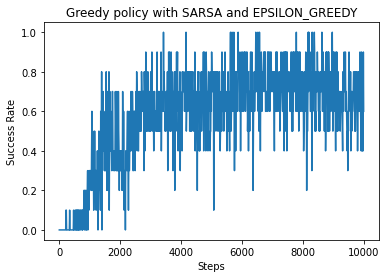

In [8]:
# Train for n_episode
for i_episode in range(n_episode):

    # Reset the expisode's cumulative reward
    total_return = 0.0

    # Start fresh with a new episode state
    s = env.reset()

    # Select the first action in this episode

    a = take_action_using_epsilon_greedy(s, q_table)

    for i_step in range(max_horizon):

        # Take action and receive the enviroment's feedback
        s_prime, r, done, info = env.step(a)

        total_return += np.power(gamma, i_step) * r

        # Select an action
        if explore_method == "EPSILON_GREEDY":
            a_prime = take_action_using_epsilon_greedy(s_prime, q_table)
        else:
            raise ValueError("Wrong Explore Method:".format(explore_method))

        # Update a Q value table
        if rl_algorithm == 'SARSA':
            q_table[s, a] = sarsa_update(q_table, s, a, r, s_prime, a_prime)
        else:
            raise ValueError("Wrong RL algorithm:".format(rl_algorithm))

        # Transition to new state
        s = s_prime
        a = a_prime

        if done:
            window.append(r)
            last_100 = window.count(1)

            greedy_success_rate_monitor[i_episode - 1, 0], greedy_discounted_return_monitor[
                i_episode - 1, 0] = evaluate_policy(q_table, env, eval_steps, max_horizon, explore_method)
            if verbose:
                print(
                    "Episode: {0}\t Num_Steps: {1:>4}\tTotal_Return: {2:>5.2f}\tFinal_Reward: {3}\tEpsilon: {4:.3f}\tSuccess Rate: {5:.3f}\tLast_100: {6}".format(
                        i_episode, i_step, total_return, r, epsilon, greedy_success_rate_monitor[i_episode - 1, 0],
                        last_100))

            break

    # Schedule for epsilon
    epsilon = epsilon * epsilon_decay

# env.render()

plt.figure(0)
plt.plot(range(0, n_episode, 10), greedy_success_rate_monitor[0::10, 0])
plt.title("Greedy policy with {0} and {1}".format(rl_algorithm, explore_method))
plt.xlabel("Steps")
plt.ylabel("Success Rate")

plt.show()

We can see the success rate goes from 0 to around 80% with 10000 episodes!!

## Lets test it on an episode

In [10]:

# Show an episode

for i_step in range(max_horizon):
#     env.render()
    a = np.argmax(q_table[s, :])
    s, r, done, info = env.step(a)
    total_return += np.power(gamma, i_step) * r

    if done:
        print("Episode: {0}\t Num_Steps: {1:>4}\tTotal_Return: {2:>5.2f}\tFinal_Reward: {3}".format(1, i_step,
                                                                                                    total_return,
                                                                                                    r))
        break

# Print the Policy
for s in range(n_s):
    actions = ['LEFT', 'DOWN', 'RIGHT', 'UP']
    print(actions[np.argmax(q_table[s, :])])

Episode: 1	 Num_Steps:    0	Total_Return:  0.75	Final_Reward: 0
LEFT
UP
LEFT
LEFT
LEFT
LEFT
RIGHT
LEFT
UP
DOWN
LEFT
LEFT
LEFT
RIGHT
DOWN
LEFT


# Conlusion:
SARSA was effective and has better convergence compared to Qlearning methods

### Resources:
1. https://towardsdatascience.com/on-policy-v-s-off-policy-learning-75089916bc2f
1. https://stackoverflow.com/questions/34181056/q-learning-vs-temporal-difference-vs-model-based-reinforcement-learning
1. https://www.geeksforgeeks.org/sarsa-reinforcement-learning/